In [7]:
import os
import pandas as pd
import yaml

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [8]:
root_dir = r".\results\2024Apr10-115050_configs"

In [9]:
def collect_experiment_data(root_dir):
    """
    Collects experiment data and selected parameters from configuration files across multiple runs.

    Parameters:
    - root_dir: The root directory where experiment results are stored.

    Returns:
    - A pandas DataFrame containing the collected data and parameters.
    """
    all_data = []

    # Walk through the directory structure
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith("loss_record.csv"):
                # Path to the current file
                file_path = os.path.join(subdir, file)
                # Read the loss record CSV file
                df = pd.read_csv(file_path)

                # Load the corresponding cfg.yaml file to get parameters
                cfg_path = os.path.join(subdir, "cfg.yaml")
                with open(cfg_path, "r") as cfg_file:
                    cfg_data = yaml.safe_load(cfg_file)

                # Extract needed parameters
                run_id = cfg_data.get("run_id")
                tau = cfg_data["tau"]
                min_samples = cfg_data["min_samples"]

                # Add parameters as new columns to the DataFrame
                df["run_id"] = run_id
                df["tau"] = tau
                df["min_samples"] = min_samples

                # Append to the list of all data
                all_data.append(df)

    # Concatenate all data into a single DataFrame
    return pd.concat(all_data, ignore_index=True)


combined_data = collect_experiment_data(root_dir)
combined_data

aggregated_df = (
    combined_data.groupby(["run_id", "tau", "min_samples"])
    .agg({"epoch": "max"})
    .reset_index()
)

aggregated_df

,run_id,tau,min_samples,epoch
0,0,0.001,10,19
1,0,0.010,10,19
2,0,0.100,10,19
3,0,1.000,10,19
4,1,0.001,10,19
5,1,0.010,10,19
6,1,0.100,10,19
7,1,1.000,10,19
8,2,0.001,10,19
9,2,0.010,10,19


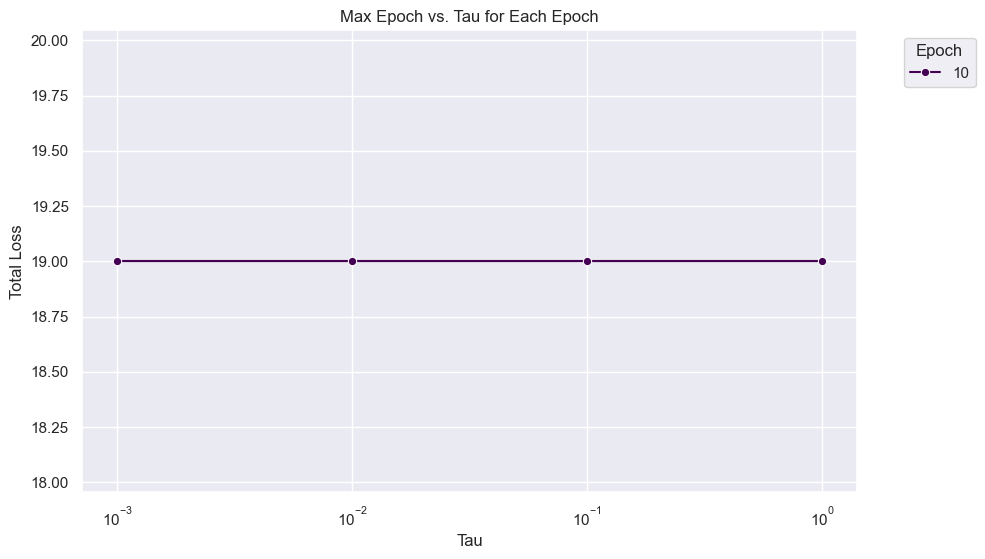

In [10]:
plt.figure(figsize=(10, 6))
# Assuming you want to plot the loss for the last epoch of each run, you can filter or aggregate the data as needed
sns.lineplot(
    data=aggregated_df,
    x="tau",
    y="epoch",
    hue="min_samples",
    palette="viridis",
    marker="o",
)
plt.xlabel("Tau")
plt.ylabel("Total Loss")
plt.xscale("log")
# plt.yscale('log')
plt.title("Max Epoch vs. Tau for Each Epoch")
plt.legend(title="Epoch", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [11]:
def collect_bellman_errors(root_dir):
    """
    Collects Bellman error values and selected parameters from configuration files across multiple runs.

    Parameters:
    - root_dir: The root directory where experiment results are stored.

    Returns:
    - A pandas DataFrame containing the collected Bellman errors and parameters.
    """
    all_errors = []

    # Walk through the directory structure
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file == "bellman_error.txt":
                # Path to the current file
                file_path = os.path.join(subdir, file)
                # Read the Bellman error value from the file
                with open(file_path, "r") as error_file:
                    bellman_error = float(error_file.read().strip())

                # Load the corresponding cfg.yaml file to get parameters
                cfg_path = os.path.join(subdir, "cfg.yaml")
                with open(cfg_path, "r") as cfg_file:
                    cfg_data = yaml.safe_load(cfg_file)

                # Extract needed parameters
                run_id = cfg_data.get("run_id")
                tau = cfg_data["tau"]
                min_samples = cfg_data["min_samples"]

                # Create a dictionary with the collected data
                error_data = {
                    "run_id": run_id,
                    "tau": tau,
                    "min_samples": min_samples,
                    "bellman_error": bellman_error,
                }

                # Append to the list of all errors
                all_errors.append(error_data)

    # Convert the list of dictionaries to a DataFrame
    return pd.DataFrame(all_errors)


# Example usage
bellman_errors_df = collect_bellman_errors(root_dir)
bellman_errors_df

,run_id,tau,min_samples,bellman_error
0,0,0.001,10,2.223673e-02
1,1,0.001,10,1.820778e-01
2,2,0.001,10,3.102436e-04
3,3,0.001,10,7.989863e-03
4,4,0.001,10,1.232845e+08
5,5,0.001,10,9.611415e-03
6,6,0.001,10,7.502755e-03
7,7,0.001,10,5.337324e-03
8,8,0.001,10,1.017986e-02
9,9,0.001,10,7.630920e-03


In [12]:
# bellman_errors_df_filtered = bellman_errors_df[bellman_errors_df["tau"]!=0.01]
bellman_errors_df_filtered = bellman_errors_df[bellman_errors_df["min_samples"] != 0]

In [13]:
bellman_errors_df_filtered["min_samples"] = bellman_errors_df_filtered[
    "min_samples"
].astype(str)

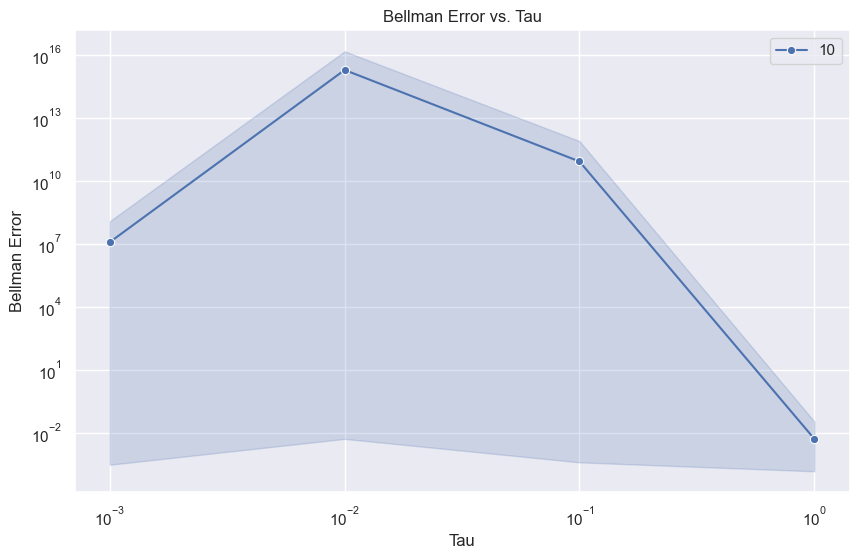

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=bellman_errors_df_filtered,
    x="tau",
    y="bellman_error",
    hue="min_samples",
    marker="o",
    errorbar=("pi", 100)
    # label="Bellman Error",
)
plt.xlabel("Tau")
plt.ylabel("Bellman Error")
plt.xscale("log")
plt.yscale("log")
plt.title("Bellman Error vs. Tau")
plt.legend()
plt.show()

In [15]:
high_tau_df = bellman_errors_df_filtered[bellman_errors_df_filtered["tau"] == 1]
high_tau_df["bellman_error"].mean()

0.005301808319927659

In [16]:
bellman_errors_df_filtered["bellman_error"].min()

0.0001512123126303777

In [17]:
bellman_errors_df_filtered

,run_id,tau,min_samples,bellman_error
0,0,0.001,10,2.223673e-02
1,1,0.001,10,1.820778e-01
2,2,0.001,10,3.102436e-04
3,3,0.001,10,7.989863e-03
4,4,0.001,10,1.232845e+08
5,5,0.001,10,9.611415e-03
6,6,0.001,10,7.502755e-03
7,7,0.001,10,5.337324e-03
8,8,0.001,10,1.017986e-02
9,9,0.001,10,7.630920e-03


In [18]:
# use mdp to generate transition distribution
# this generates another dataset of transitions

# then apply:
# ### Training
# input_size = len(states[0])  # Or another way to represent the size of your input
# output_size = len(actions)

# # Initialize the DQN
# dqn = DQN(input_size, output_size)

# loss_record = train_dqn(
#     dqn,
#     sampled_transitions_train,
#     Q_pi_random,
#     states,
#     actions,
#     gamma,
#     epsilon,
#     batch_size=batch_size,
#     max_iterations=train_max_iterations,
#     logger=logger,
# )

# bm_error = compute_bellmans_error(
#     dqn, validation_transitions=transitions_val, gamma=gamma
# )

### AND

# policy evaluation

# plot both

In [19]:
# do policy evaluation on train datasets -> Q
# Evaluate with Q on validation set

# training DQN == value iteration
# we want to do policy evaluation with DQN (we do this by changing the loss function with bellman equation for Q pi instead of Q*)
# if we want to do early stopping, do it with Q* instead of Q pi random

In [20]:
print(30 * 20 * 3, 30.75 / (30 * 20 * 3))
print(35 * 25 * 4, 34.7 / (35 * 25 * 4))
print(35 * 27 * 5, 32.2 / (35 * 27 * 5))
print(41 * 25 * 8, 40.49 / (41 * 25 * 8))
print(43 * 29 * 7.5, 60 / (43 * 29 * 7.5))
print(44 * 34 * 5, 46 / (44 * 34 * 5))

1800 0.017083333333333332
3500 0.009914285714285716
4725 0.006814814814814815
8200 0.004937804878048781
9352.5 0.006415396952686447
7480 0.006149732620320855
